In [176]:
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
from collections import Counter
nlp = spacy.load('en_core_web_md')

In [2]:
hnews=pd.read_csv('/Users/adityaravindrabhat/Documents/GitHub/engagement_models/Datasets/MetaAndTextDatasets/hot_news/hot_news_articles_meta_new.csv')
hnews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4129 entries, 0 to 4128
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    4129 non-null   object
 1   id            4129 non-null   object
 2   title         4121 non-null   object
 3   published_at  3594 non-null   object
 4   publish_date  3720 non-null   object
 5   tweets        4129 non-null   object
 6   domain        4129 non-null   object
 7   movies        4129 non-null   object
 8   tags          4129 non-null   object
 9   top_image     1 non-null      object
 10  links         4129 non-null   object
 11  Unnamed: 11   1 non-null      object
 12  Unnamed: 12   1 non-null      object
 13  Unnamed: 13   1 non-null      object
 14  Unnamed: 14   1 non-null      object
 15  Unnamed: 15   1 non-null      object
 16  Unnamed: 16   1 non-null      object
 17  Unnamed: 17   1 non-null      object
 18  Unnamed: 18   1 non-null      object
 19  Unname

In [4]:
hnews=hnews[['id','title','published_at','publish_date','tweets','domain','movies','tags','links']]
hnews.head()

,id,title,published_at,publish_date,tweets,domain,movies,tags,links
0,ooqc6i,r/news - 2020 Tokyo Olympics Megathread,NaN,NaN,[],www.reddit.com,[],[],"['/r/sports/', '/r/olympics/', 'https://olympi..."
1,oou7kh,Disturbing message written on man’s chest,2021-07-20 22:58:00+00:00,2021-07-20T22:58:00.000Z,[],www.news.com.au,[],[],['https://nypost.com/2021/07/20/man-found-dead...
2,oorcsq,New Jersey hospital system fires 6 employees w...,2021-07-21 14:37:00+00:00,Wed Jul 21 2021 14:37:00 GMT+0000 (UTC),[],www.nbcnews.com,[],[],['https://www.rwjbh.org/blog/2021/may/rwjbarna...
3,oonzyz,Yosemite park ranger shares heartbreaking plea...,2021-07-21 00:39:35+00:00,2021-07-21T00:39:35Z,[],www.cnn.com,[],[],['https://www.facebook.com/YosemiteNPS/posts/4...
4,oowppz,Sheriff’s office captain found passed out in t...,2021-07-21 21:46:32.448000+00:00,2021-07-21T21:46:32.448Z,[],www.wftv.com,[],[],['https://www.wftv.com/news/trending/how-do-yo...


In [5]:
hnews.shape

(4129, 9)

In [6]:
hot_news=pd.read_csv('/Users/adityaravindrabhat/Downloads/Final Datasets/SemicleanDatasets_v1/hot_news_v1.csv')
hot_news.head()

,Rank,title,score,id,url,comms_num,author,upvote_ratio,flair,created_utc,...,domain,is_crosspostable,visited,upvote,ups,is_video,link_flair_text,gilded,created_date,created_time
0,1,2020 Tokyo Olympics Megathread,49,ooqc6i,https://www.reddit.com/r/news/comments/ooqc6i/...,142,NewsModTeam,0.65,Does not answer PMs,2021-07-21 09:53:34-04:00,...,self.news,True,False,<bound method VotableMixin.upvote of Submissio...,49,False,NaN,0,7/21/21,9:53:34
1,2,Man found dead with ‘I touch little girls’ wri...,14470,oou7kh,https://www.news.com.au/world/north-america/ma...,1859,WritesUaSong,0.97,NaN,2021-07-21 13:05:18-04:00,...,news.com.au,True,False,<bound method VotableMixin.upvote of Submissio...,14470,False,NaN,0,7/21/21,13:05:18
2,3,New Jersey hospital fires 6 employees who did ...,32350,oorcsq,https://www.nbcnews.com/news/us-news/new-jerse...,3818,Dictator0,0.88,NaN,2021-07-21 10:46:33-04:00,...,nbcnews.com,True,False,<bound method VotableMixin.upvote of Submissio...,32350,False,NaN,0,7/21/21,10:46:33
3,4,Yosemite park ranger shares heartbreaking plea...,44462,oonzyz,https://www.cnn.com/travel/amp/yosemite-bear-k...,2319,ezzrd,0.92,NaN,2021-07-21 07:30:04-04:00,...,cnn.com,True,False,<bound method VotableMixin.upvote of Submissio...,44462,False,NaN,0,7/21/21,7:30:04
4,5,Sheriff’s office captain found passed out in t...,2004,oowppz,https://www.wftv.com/news/9investigates/scso-c...,227,AllenZulu,0.97,NaN,2021-07-21 15:09:03-04:00,...,wftv.com,True,False,<bound method VotableMixin.upvote of Submissio...,2004,False,NaN,0,7/21/21,15:09:03


In [70]:
hot_news.shape

(13700, 23)

In [7]:
hot_main=hot_news.merge(hnews,on='id',how='left')
hot_main.shape

(13700, 31)

In [8]:
hot_main.columns

Index(['Rank', 'title_x', 'score', 'id', 'url', 'comms_num', 'author',
       'upvote_ratio', 'flair', 'created_utc', 'clicked', 'edited',
       'no_crossposts', 'domain_x', 'is_crosspostable', 'visited', 'upvote',
       'ups', 'is_video', 'link_flair_text', 'gilded', 'created_date',
       'created_time', 'title_y', 'published_at', 'publish_date', 'tweets',
       'domain_y', 'movies', 'tags', 'links'],
      dtype='object')

In [9]:
hot_main['domain_x'].value_counts(normalize=True).nlargest(10)*100

cnn.com            9.927007
apnews.com         9.306569
nbcnews.com        7.854015
theguardian.com    6.364964
abcnews.go.com     5.817518
reuters.com        5.729927
cnbc.com           5.051095
bbc.com            3.065693
cbsnews.com        2.270073
cbc.ca             1.540146
Name: domain_x, dtype: float64

In [122]:
hnews['link_count']=hnews['links'].apply(lambda n: len(n.split(',')))

In [125]:
hnews['link_count'].describe()

count    4128.000000
mean        5.993459
std         7.764726
min         1.000000
25%         1.000000
50%         4.000000
75%         8.000000
max       258.000000
Name: link_count, dtype: float64

In [126]:
hnews['link_count'].median()

4.0

In [13]:
hot_main['tags_count']=hot_main['tags'].apply(lambda n: len(n.split(',')))
hot_main[['tags','tags_count']].head(25)

AttributeError: 'float' object has no attribute 'split'

##### Test Code initially used for merging on title but figured out how to add id instead to merge the above dfs

In [49]:
import recordlinkage

In [51]:
#Create indexing object
indexer=recordlinkage.Index()

#Generate pairs blocked on title
indexer.block('title')
pairs=indexer.index(hot_news,hnews)

#Creating a compare object
compare_cl=recordlinkage.Compare()

compare_cl.string('title','title',threshold=0.95,label='title')

#find matches
potential_matches=compare_cl.compute(pairs,hot_news,hnews)

In [52]:
potential_matches['title'].describe()

count    10143.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: title, dtype: float64

In [59]:
import numpy as np
import joblib,fuzzywuzzy
from fuzzywuzzy import fuzz,process
from joblib import Parallel,delayed

In [60]:
metric = fuzz.token_sort_ratio

thresh=85

ca=np.array(hot_news[['title']])
cb=np.array(hnews[['title']])

def parallel_fuzzy_match(idxa,idxb):
    return [ca[idxa][0],cb[idxb][0],metric(ca[idxa][0],cb[idxb][0])]  

results = Parallel(n_jobs=-1,verbose=1)(delayed(parallel_fuzzy_match)(idx1, idx2) for idx1 in range(len(ca)) for idx2 in range(len(cb)) \
                   if(metric(ca[idx1][0],cb[idx2][0]) > thresh))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   28.9s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   47.8s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 6034 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done 7184 tasks      | elapsed: 12.9min
[Parallel(n_jobs=-1)]: Done 8434 tasks      | elapsed: 15.3min
[Parallel(n_jobs=-1)]: Done 9784 tasks      | elapsed: 17.7min
[Parallel(n_jobs=-1)]: Done 11234 tasks      |

In [71]:
results = pd.DataFrame(results,columns = ["title_a","title_b","Score"])
results.head()

,title_a,title_b,Score
0,2020 Tokyo Olympics Megathread,2020 Tokyo Olympics Megathread,100
1,2020 Tokyo Olympics Megathread,r/news - 2020 Tokyo Olympics Megathread,90
2,New Jersey hospital fires 6 employees who did ...,New Jersey hospital system fires 6 employees w...,95
3,New Jersey hospital fires 6 employees who did ...,New Jersey hospital system fires 6 employees w...,95
4,Yosemite park ranger shares heartbreaking plea...,Yosemite park ranger shares heartbreaking plea...,100


#### End of test code

### LIWC DIMENSIONALITY REDUCTION

In [19]:
liwc=pd.read_csv('/Users/adityaravindrabhat/Documents/GitHub/engagement_models/Datasets/MetaAndTextDatasets/hot_news/LIWC_hot_news_body.csv')
#id and text columns are removed as they are only used for reference and not needed for PCA
liwc=liwc.drop(['id','text'],axis=1)
liwc.head()

,WC,Analytic,Clout,Authentic,Tone,WPS,Sixltr,Dic,function,pronoun,...,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP
0,174.0,98.36,69.76,44.14,25.77,24.86,27.01,67.24,35.06,4.02,...,5.17,0.00,0.57,0.0,0.0,1.72,1.15,1.15,1.15,2.30
1,193.0,96.32,76.59,12.13,1.45,21.44,22.28,73.58,44.56,8.81,...,7.77,0.00,0.00,0.0,0.0,2.07,3.11,1.55,1.04,1.04
2,300.0,97.80,76.83,52.22,20.70,18.75,24.67,79.67,43.00,3.67,...,9.00,0.33,1.00,0.0,0.0,0.33,0.67,1.67,0.00,0.00
3,495.0,91.40,83.90,6.95,44.24,21.52,24.85,76.97,44.44,7.68,...,4.85,0.00,0.00,0.0,0.0,1.62,6.06,1.62,0.00,0.00
4,187.0,99.00,47.86,66.34,11.81,20.78,21.93,68.45,36.36,0.53,...,9.09,0.00,0.00,0.0,0.0,1.60,0.00,2.67,0.00,0.00


In [33]:
pipe=Pipeline([('scaler',StandardScaler()),
               ('reducer',PCA(n_components=0.95))])
pipe.fit(liwc)
print('{} components selected'.format(len(pipe.steps[1][1].components_)))

59 components selected


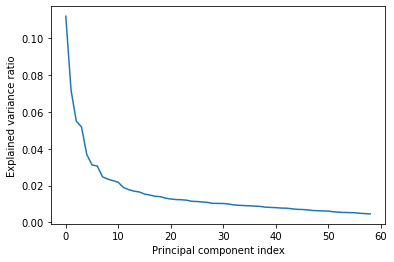

In [35]:
plt.plot(pipe.steps[1][1].explained_variance_ratio_)
plt.xlabel('Principal component index')
plt.ylabel('Explained variance ratio')
plt.show()

In [34]:
# Build the pipeline
pipe = Pipeline([('scaler', StandardScaler()),
                 ('reducer', PCA(n_components=59))])

# Fit it to the dataset and extract the component vectors
pipe.fit(liwc)
vectors = pipe.steps[1][1].explained_variance_ratio_.cumsum()
print(vectors)

# Print feature effects
#print('PC 1 effects = ' + str(dict(zip(poke_df.columns, vectors[0]))))
#print('PC 2 effects = ' + str(dict(zip(poke_df.columns, vectors[1]))))

[0.11205117 0.18393705 0.2389971  0.29083744 0.32777884 0.35903642
 0.38969558 0.41447566 0.43804102 0.46074119 0.48253678 0.50150512
 0.51931452 0.53631893 0.55287405 0.56830988 0.58319678 0.59742489
 0.61142937 0.62461601 0.63735786 0.64979418 0.66213636 0.67422745
 0.6857133  0.69708619 0.70819054 0.71907972 0.72945522 0.73980072
 0.75010031 0.76012693 0.76964998 0.77898444 0.7881264  0.79716672
 0.80601878 0.81474328 0.82306191 0.83123398 0.83927124 0.84708728
 0.85483578 0.86227953 0.86940783 0.87645133 0.88328721 0.88980711
 0.89616413 0.90242366 0.9086146  0.91439062 0.91996825 0.9253828
 0.93074285 0.93600073 0.94099438 0.94578759 0.95041805]


In [9]:
liwc_new_news=pd.read_csv('/Users/adityaravindrabhat/Documents/GitHub/engagement_models/Datasets/MetaAndTextDatasets/new_news/LIWC_new_news_body.csv')


In [10]:
liwc_new_news=liwc_new_news.drop(['id','text'],axis=1)
liwc_new_news=liwc_new_news.dropna()
liwc_new_news.head()

,WC,Analytic,Clout,Authentic,Tone,WPS,Sixltr,Dic,function,pronoun,...,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP
0,501.0,90.98,71.86,8.53,14.70,26.37,24.75,78.64,47.90,9.18,...,6.19,0.00,0.0,0.0,0.0,0.80,3.99,1.40,0.00,0.2
1,157.0,67.36,83.04,10.21,89.62,22.43,19.75,81.53,55.41,11.46,...,6.37,0.64,0.0,0.0,0.0,0.64,7.64,1.27,1.27,0.0
2,268.0,95.36,80.45,32.55,2.57,22.33,20.90,83.58,51.87,7.09,...,5.60,0.00,0.0,0.0,0.0,0.75,2.99,0.00,0.75,0.0
3,149.0,93.26,44.67,77.35,9.34,21.29,22.15,73.15,43.62,4.70,...,6.71,0.00,0.0,0.0,0.0,2.01,1.34,1.34,0.00,0.0
4,446.0,91.93,90.69,29.18,9.31,17.84,21.30,80.04,45.74,10.76,...,5.83,0.45,0.0,0.0,0.0,0.67,2.24,1.35,0.00,0.0


In [11]:
pipe=Pipeline([('scaler',StandardScaler()),
               ('reducer',PCA(n_components=0.95))])
pipe.fit(liwc_new_news)
print('{} components selected'.format(len(pipe.steps[1][1].components_)))

59 components selected


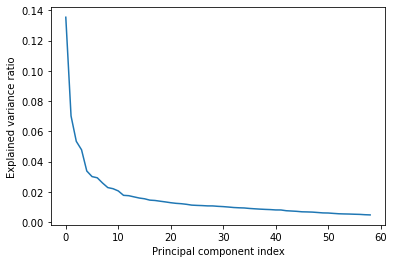

In [12]:
plt.plot(pipe.steps[1][1].explained_variance_ratio_)
plt.xlabel('Principal component index')
plt.ylabel('Explained variance ratio')
plt.show()

In [13]:
liwc_h_crypto=pd.read_csv('/Users/adityaravindrabhat/Documents/GitHub/engagement_models/Datasets/MetaAndTextDatasets/hot_crypto/LIWC_hot_crypto_body.csv')
liwc_h_crypto=liwc_h_crypto.drop(['id','text'],axis=1)
liwc_h_crypto=liwc_h_crypto.dropna()
liwc_h_crypto.head()

,WC,Analytic,Clout,Authentic,Tone,WPS,Sixltr,Dic,function,pronoun,...,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP
0,285.0,79.38,31.17,43.37,92.71,23.75,22.11,83.51,45.96,8.42,...,5.61,0.70,0.0,0.0,0.00,0.70,0.00,2.46,0.70,3.86
1,744.0,90.71,80.51,15.00,58.83,41.33,23.39,80.11,45.16,11.42,...,3.76,0.94,0.0,0.0,0.00,2.82,0.54,1.88,0.54,1.75
2,110.0,42.39,76.64,72.26,87.86,13.75,10.00,88.18,51.82,9.09,...,3.64,0.00,0.0,0.0,0.00,0.91,0.00,2.73,1.82,1.82
3,82.0,57.53,54.84,48.21,48.39,27.33,9.76,75.61,47.56,13.41,...,6.10,2.44,0.0,0.0,1.22,1.22,0.00,2.44,0.00,2.44
4,33.0,66.08,81.84,31.94,1.59,16.50,9.09,100.00,60.61,21.21,...,6.06,0.00,0.0,0.0,0.00,0.00,0.00,3.03,0.00,0.00


In [14]:
pipe=Pipeline([('scaler',StandardScaler()),
               ('reducer',PCA(n_components=0.95))])
pipe.fit(liwc_h_crypto)
print('{} components selected'.format(len(pipe.steps[1][1].components_)))

59 components selected


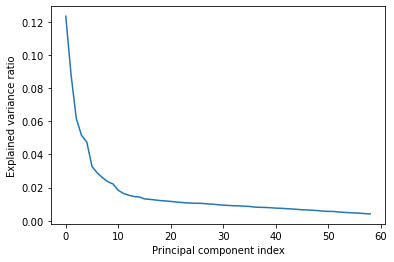

In [15]:
plt.plot(pipe.steps[1][1].explained_variance_ratio_)
plt.xlabel('Principal component index')
plt.ylabel('Explained variance ratio')
plt.show()

In [16]:
plt.savefig('/Users/adityaravindrabhat/Documents/GitHub/engagement_models/Datasets/screenshots/liwc_pca.png')

<Figure size 432x288 with 0 Axes>

### NER ON Hot news articles

In [94]:
article_text=pd.read_csv('/Users/adityaravindrabhat/Documents/GitHub/engagement_models/Datasets/MetaAndTextDatasets/hot_news/hot_news_body.csv')
article_text.head()

,id,body
0,oonzyz,A ranger at Yosemite National Park is pleading...
1,oop5by,A federal judge on Tuesday ordered Capitol rio...
2,oowl4x,Weinstein has already been convicted in New Yo...
3,ooxkr8,"HIGHLAND COUNTY, Ohio (WXIX) - A 21-year-old i..."
4,ooubrc,"""I want this chapter in my life closed,"" Wersh..."


In [66]:
article_text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4129 entries, 0 to 4128
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      4125 non-null   object
 1   body    4059 non-null   object
dtypes: object(2)
memory usage: 64.6+ KB


In [95]:
article_text=article_text[article_text['body'].notnull()]
article_text.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4059 entries, 0 to 4128
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      4059 non-null   object
 1   body    4059 non-null   object
dtypes: object(2)
memory usage: 95.1+ KB


In [ ]:
def entity_extraction(text):
    all_ent_labelst=[]
    doc=nlp(text.strip())
    ents=doc.ents
    all_ent_labelst += [ent.label_ for ent in ents]
    #all_ent_labelst =list(all_ent_labelst)
    c=Counter(all_ent_labelst)
    return c

In [177]:
article_text['entities']=article_text['body'].apply(entity_extraction)
print(article_text.info())
print(article_text.head(10))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4059 entries, 0 to 4128
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        4059 non-null   object
 1   body      4059 non-null   object
 2   entities  4059 non-null   object
dtypes: object(3)
memory usage: 126.8+ KB
None
       id                                               body  \
0  oonzyz  A ranger at Yosemite National Park is pleading...   
1  oop5by  A federal judge on Tuesday ordered Capitol rio...   
2  oowl4x  Weinstein has already been convicted in New Yo...   
3  ooxkr8  HIGHLAND COUNTY, Ohio (WXIX) - A 21-year-old i...   
4  ooubrc  "I want this chapter in my life closed," Wersh...   
5  oohsex  From groceries and streaming subscriptions to ...   
6  ooyppv  The top administrator of the US Conference of ...   
7  oos734  It's 30C (86F) when our small propeller plane ...   
8  oooxqo  The Guardian has identified an Alaska assistan...   
9  oowyk8  (CNN) 

In [180]:
e_dict=dict(article_text['entities'])

In [182]:
entity_count=pd.DataFrame(e_dict)
entity_count=entity_count.T
entity_count.head(10)

,FAC,DATE,CARDINAL,GPE,ORG,PERSON,TIME,WORK_OF_ART,ORDINAL,LOC,NORP,PRODUCT,MONEY,LAW,EVENT,PERCENT,QUANTITY,LANGUAGE
0,1.0,4.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,6.0,5.0,7.0,13.0,11.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,16.0,7.0,11.0,5.0,12.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,13.0,4.0,11.0,8.0,15.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,6.0,1.0,1.0,2.0,6.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,1.0,NaN,1.0,7.0,4.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,6.0,NaN,6.0,9.0,6.0,NaN,NaN,NaN,NaN,4.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,5.0,2.0,4.0,2.0,5.0,NaN,NaN,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2.0,23.0,5.0,14.0,17.0,29.0,NaN,1.0,2.0,1.0,12.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,8.0,6.0,2.0,22.0,6.0,1.0,1.0,4.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [183]:
entity_count=entity_count.fillna(0)
entity_count.head()

,FAC,DATE,CARDINAL,GPE,ORG,PERSON,TIME,WORK_OF_ART,ORDINAL,LOC,NORP,PRODUCT,MONEY,LAW,EVENT,PERCENT,QUANTITY,LANGUAGE
0,1.0,4.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,6.0,5.0,7.0,13.0,11.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,16.0,7.0,11.0,5.0,12.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,13.0,4.0,11.0,8.0,15.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,6.0,1.0,1.0,2.0,6.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


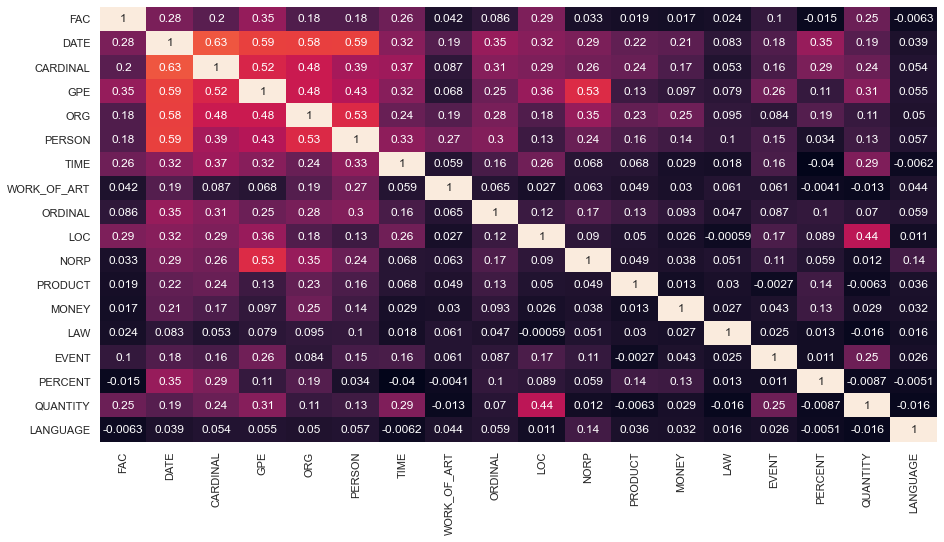

In [184]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(data=entity_count.corr(), annot=True, cbar=False);

In [77]:
art_textonly=article_text.iloc[0:,1:]
print(art_textonly.head())

                                                body
0  A ranger at Yosemite National Park is pleading...
1  A federal judge on Tuesday ordered Capitol rio...
2  Weinstein has already been convicted in New Yo...
3  HIGHLAND COUNTY, Ohio (WXIX) - A 21-year-old i...
4  "I want this chapter in my life closed," Wersh...


In [78]:
art_textonly=list(art_textonly['body'])
len(art_textonly)

4059

In [172]:
test=article_text.iloc[0:10,1:]
#test=list(test['body'])
len(test)

10

In [160]:
print(test)

                                                body
0  A ranger at Yosemite National Park is pleading...
1  A federal judge on Tuesday ordered Capitol rio...
2  Weinstein has already been convicted in New Yo...


In [174]:
['counts']=test['body'].apply(entity_extraction)
test.head()

,body,counts
0,A ranger at Yosemite National Park is pleading...,"{'FAC': 1, 'DATE': 4, 'CARDINAL': 2, 'GPE': 2}"
1,A federal judge on Tuesday ordered Capitol rio...,"{'DATE': 6, 'ORG': 13, 'PERSON': 11, 'TIME': 1..."
2,Weinstein has already been convicted in New Yo...,"{'PERSON': 12, 'GPE': 11, 'CARDINAL': 7, 'DATE..."
3,"HIGHLAND COUNTY, Ohio (WXIX) - A 21-year-old i...","{'GPE': 11, 'DATE': 13, 'PERSON': 15, 'LOC': 1..."
4,"""I want this chapter in my life closed,"" Wersh...","{'PERSON': 6, 'DATE': 6, 'WORK_OF_ART': 1, 'CA..."


In [175]:
count_df=pd.DataFrame(test['counts'])
count_df.to_csv('/Users/adityaravindrabhat/Downloads/count.csv')

In [159]:


all_ent_labelst =[]
docs=[]
entss=[]
counttt=[]
for column_name, item in test.iteritems():

    doc=nlp(i.strip())
    print(doc)
    #entss.append(doc.ents)
    #all_ent_labelst+=[ent.label_ for ent in ents]
    #return all_ent_labelst
#print(len(docs))

A ranger at Yosemite National Park is pleading to visitors to drive slow and stay alert after another bear was killed by a car.

The ranger goes into detail on how they set off to locate the bear's body and move it off the roadway to "prevent any other animals from getting hit while scavenging on it." The ranger also says they will takes measurements, collect samples and other data while at the scene. The bear's death will be yet another number to add to the total of bears hit by vehicles this year.

"I try to remember how many times I've done this now and, truthfully, I don't know," reads the post. "This is not what any of us signs up for, but it's a part of the job nonetheless."

Eight bears have been hit by vehicles along the park's road

The ranger said the female cub that was hit by the car couldn't have been more than six months old.

"For a moment I lose track of time as I stand there staring at its tiny body, but then the sound of more cars whizzing by reminds me of my place an

In [79]:
all_ent_labels =[]
countt=[]
for text in art_textonly:
    doc=nlp(text.strip())
    ents=doc.ents
    all_ent_labels += [ent.label_ for ent in ents]
    all_ent_labels =list(all_ent_labels)
    countt.append(Counter(all_ent_labels))


In [80]:
countt_df=pd.DataFrame(countt)
print(countt_df.info())
print(countt_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4059 entries, 0 to 4058
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   FAC          4059 non-null   int64  
 1   DATE         4059 non-null   int64  
 2   CARDINAL     4059 non-null   int64  
 3   GPE          4059 non-null   int64  
 4   ORG          4058 non-null   float64
 5   PERSON       4058 non-null   float64
 6   TIME         4058 non-null   float64
 7   WORK_OF_ART  4058 non-null   float64
 8   ORDINAL      4058 non-null   float64
 9   LOC          4056 non-null   float64
 10  NORP         4054 non-null   float64
 11  PRODUCT      4053 non-null   float64
 12  MONEY        4049 non-null   float64
 13  LAW          4049 non-null   float64
 14  EVENT        4049 non-null   float64
 15  PERCENT      4046 non-null   float64
 16  QUANTITY     4044 non-null   float64
 17  LANGUAGE     4036 non-null   float64
dtypes: float64(14), int64(4)
memory usage: 570.9 KB


In [88]:
countt_df_corr=countt_df.copy()
countt_df_corr=countt_df_corr.fillna(0)
countt_df_corr.head(10)

,FAC,DATE,CARDINAL,GPE,ORG,PERSON,TIME,WORK_OF_ART,ORDINAL,LOC,NORP,PRODUCT,MONEY,LAW,EVENT,PERCENT,QUANTITY,LANGUAGE
0,1,4,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,10,7,9,13.0,11.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,26,14,20,18.0,23.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,39,18,31,26.0,38.0,2.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,45,19,32,28.0,44.0,2.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1,46,19,33,35.0,48.0,2.0,2.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1,52,19,39,44.0,54.0,2.0,2.0,2.0,1.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1,57,21,43,46.0,59.0,2.0,2.0,2.0,3.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8,3,80,26,57,63.0,88.0,2.0,3.0,4.0,4.0,18.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0
9,3,88,32,59,85.0,94.0,3.0,4.0,8.0,5.0,18.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0


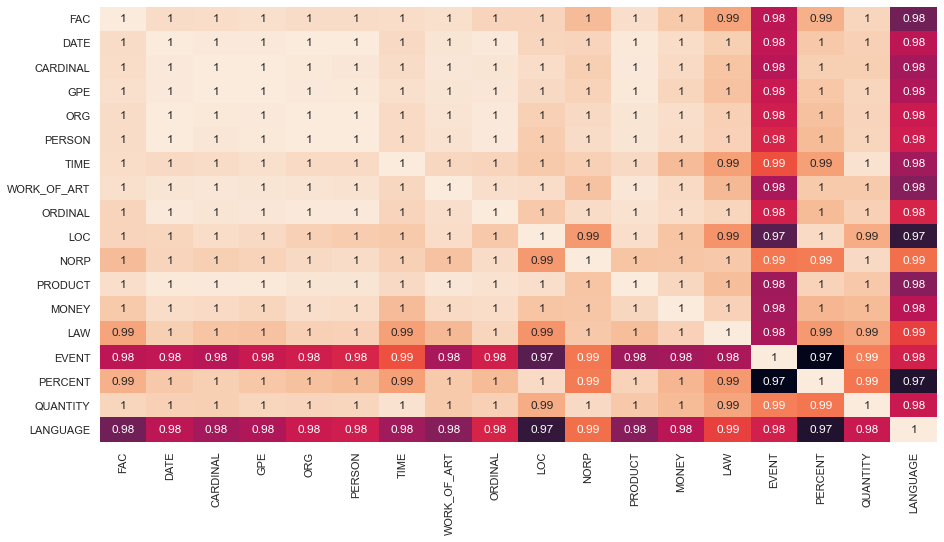

In [85]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(data=countt_df_corr.corr(), annot=True, cbar=False);